In [2]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# 모델생성을 위한 도구 불러오기
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer,Dense,Activation
import seaborn as sns

In [4]:
# 전체 데이터셋 읽어들이기
raw_df = pd.read_csv('./data/continuous_factory_process.csv', index_col="time_stamp")

raw_df_modify = raw_df.drop(raw_df.filter(regex='Setpoint').columns,axis=1)
#1번 모두 처리함(5~14까지의 컬럼 제거 즉 10개.)
raw_df_modify.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
count,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,11270.000000,...,1.127000e+04,1.127000e+04,1.127000e+04,1.127000e+04,11270.000000,1.127000e+04,1.127000e+04,1.127000e+04,1.127000e+04,11270.000000
mean,15.331195,23.842631,11.851032,205.670098,951.735828,248.870364,1242.634518,72.013212,72.011600,70.347306,...,2.743390e+00,5.324545e-01,2.912198e+00,1.835855e+01,11.620438,7.530888e+00,5.413007e+00,1.971135e+00,3.534162e+00,7.510250
std,1.188035,0.373258,0.509846,11.605754,126.701765,3.298604,96.812969,0.063138,0.405882,5.531330,...,3.897225e-01,2.069538e-01,5.175030e-01,5.020569e+00,7.618834,1.655847e+00,1.189045e+00,4.172279e-01,4.776323e-01,2.085541
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-3.511350e-95,-3.698600e-105,-1.320100e-109,-3.026500e-104,-0.003719,-5.220420e-95,-2.703210e-95,-6.200020e-96,-1.822810e-95,-3.437021
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.220000,72.000000,71.600000,69.020000,...,2.660000e+00,4.300000e-01,2.960000e+00,1.941000e+01,0.000000,7.840000e+00,5.560000e+00,2.030000e+00,3.450000e+00,7.720000
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.530000,72.000000,72.000000,71.980000,...,2.730000e+00,5.500000e-01,2.980000e+00,1.969000e+01,16.570000,7.900000e+00,5.630000e+00,2.060000e+00,3.510000e+00,7.870000
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.752500,72.000000,72.400000,72.920000,...,2.930000e+00,6.500000e-01,3.000000e+00,1.998000e+01,16.660000,7.950000e+00,5.800000e+00,2.090000e+00,3.760000e+00,8.080000
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.110000e+00,3.310000e+00,7.450000e+00,2.475599e+01,18.360000,8.590000e+00,6.320000e+00,5.200000e+00,8.000000e+00,14.260000


In [139]:
raw_df_machine0 = raw_df_modify.filter(regex='AmbientConditions') 
raw_df_machine1 = raw_df_modify.filter(regex='Machine1') #machine1인 데이터값만 가져옴
raw_df_machine2 = raw_df_modify.filter(regex='Machine2') 
raw_df_machine3 = raw_df_modify.filter(regex='Machine3') 
raw_df_machine4 = raw_df_modify.filter(regex='Machine4') 
raw_df_machine5 = raw_df_modify.filter(regex='Machine5') 
raw_df_stage1 = raw_df_modify.filter(regex='Stage1') 
raw_df_stage2 = raw_df_modify.filter(regex='Stage2') 
raw_df_firststage = raw_df_modify.filter(regex='FirstStage') 

In [140]:
stage1_corr = pd.concat([raw_df_machine0,raw_df_machine1,raw_df_machine2,raw_df_machine3,raw_df_stage1],axis=1)
raw_df_machine3

,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
time_stamp,,,,,,,,,,,,
2019-03-06 10:52:33,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0
2019-03-06 10:52:38,9.02,186,421.16,200,208.78,78.0,78.5,350.49,13.76,261.39,65.4,65.0
2019-03-06 10:52:40,9.02,186,421.16,200,220.17,77.9,78.5,351.83,13.49,260.61,65.4,65.0
2019-03-06 10:52:42,9.02,186,421.16,200,220.74,77.8,78.5,339.50,13.60,260.58,65.4,65.0
2019-03-06 10:52:43,9.02,186,421.16,200,222.18,77.8,78.5,354.74,13.99,259.89,65.4,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06 14:47:13,8.83,221,433.18,205,186.79,78.0,78.1,332.39,12.18,248.65,74.9,64.9
2019-03-06 14:47:16,8.83,221,433.18,205,195.22,78.0,78.1,337.50,12.04,248.18,74.9,64.9
2019-03-06 14:47:17,8.83,221,433.18,205,225.15,78.0,78.1,342.43,12.32,248.20,74.9,64.9


<Axes: >

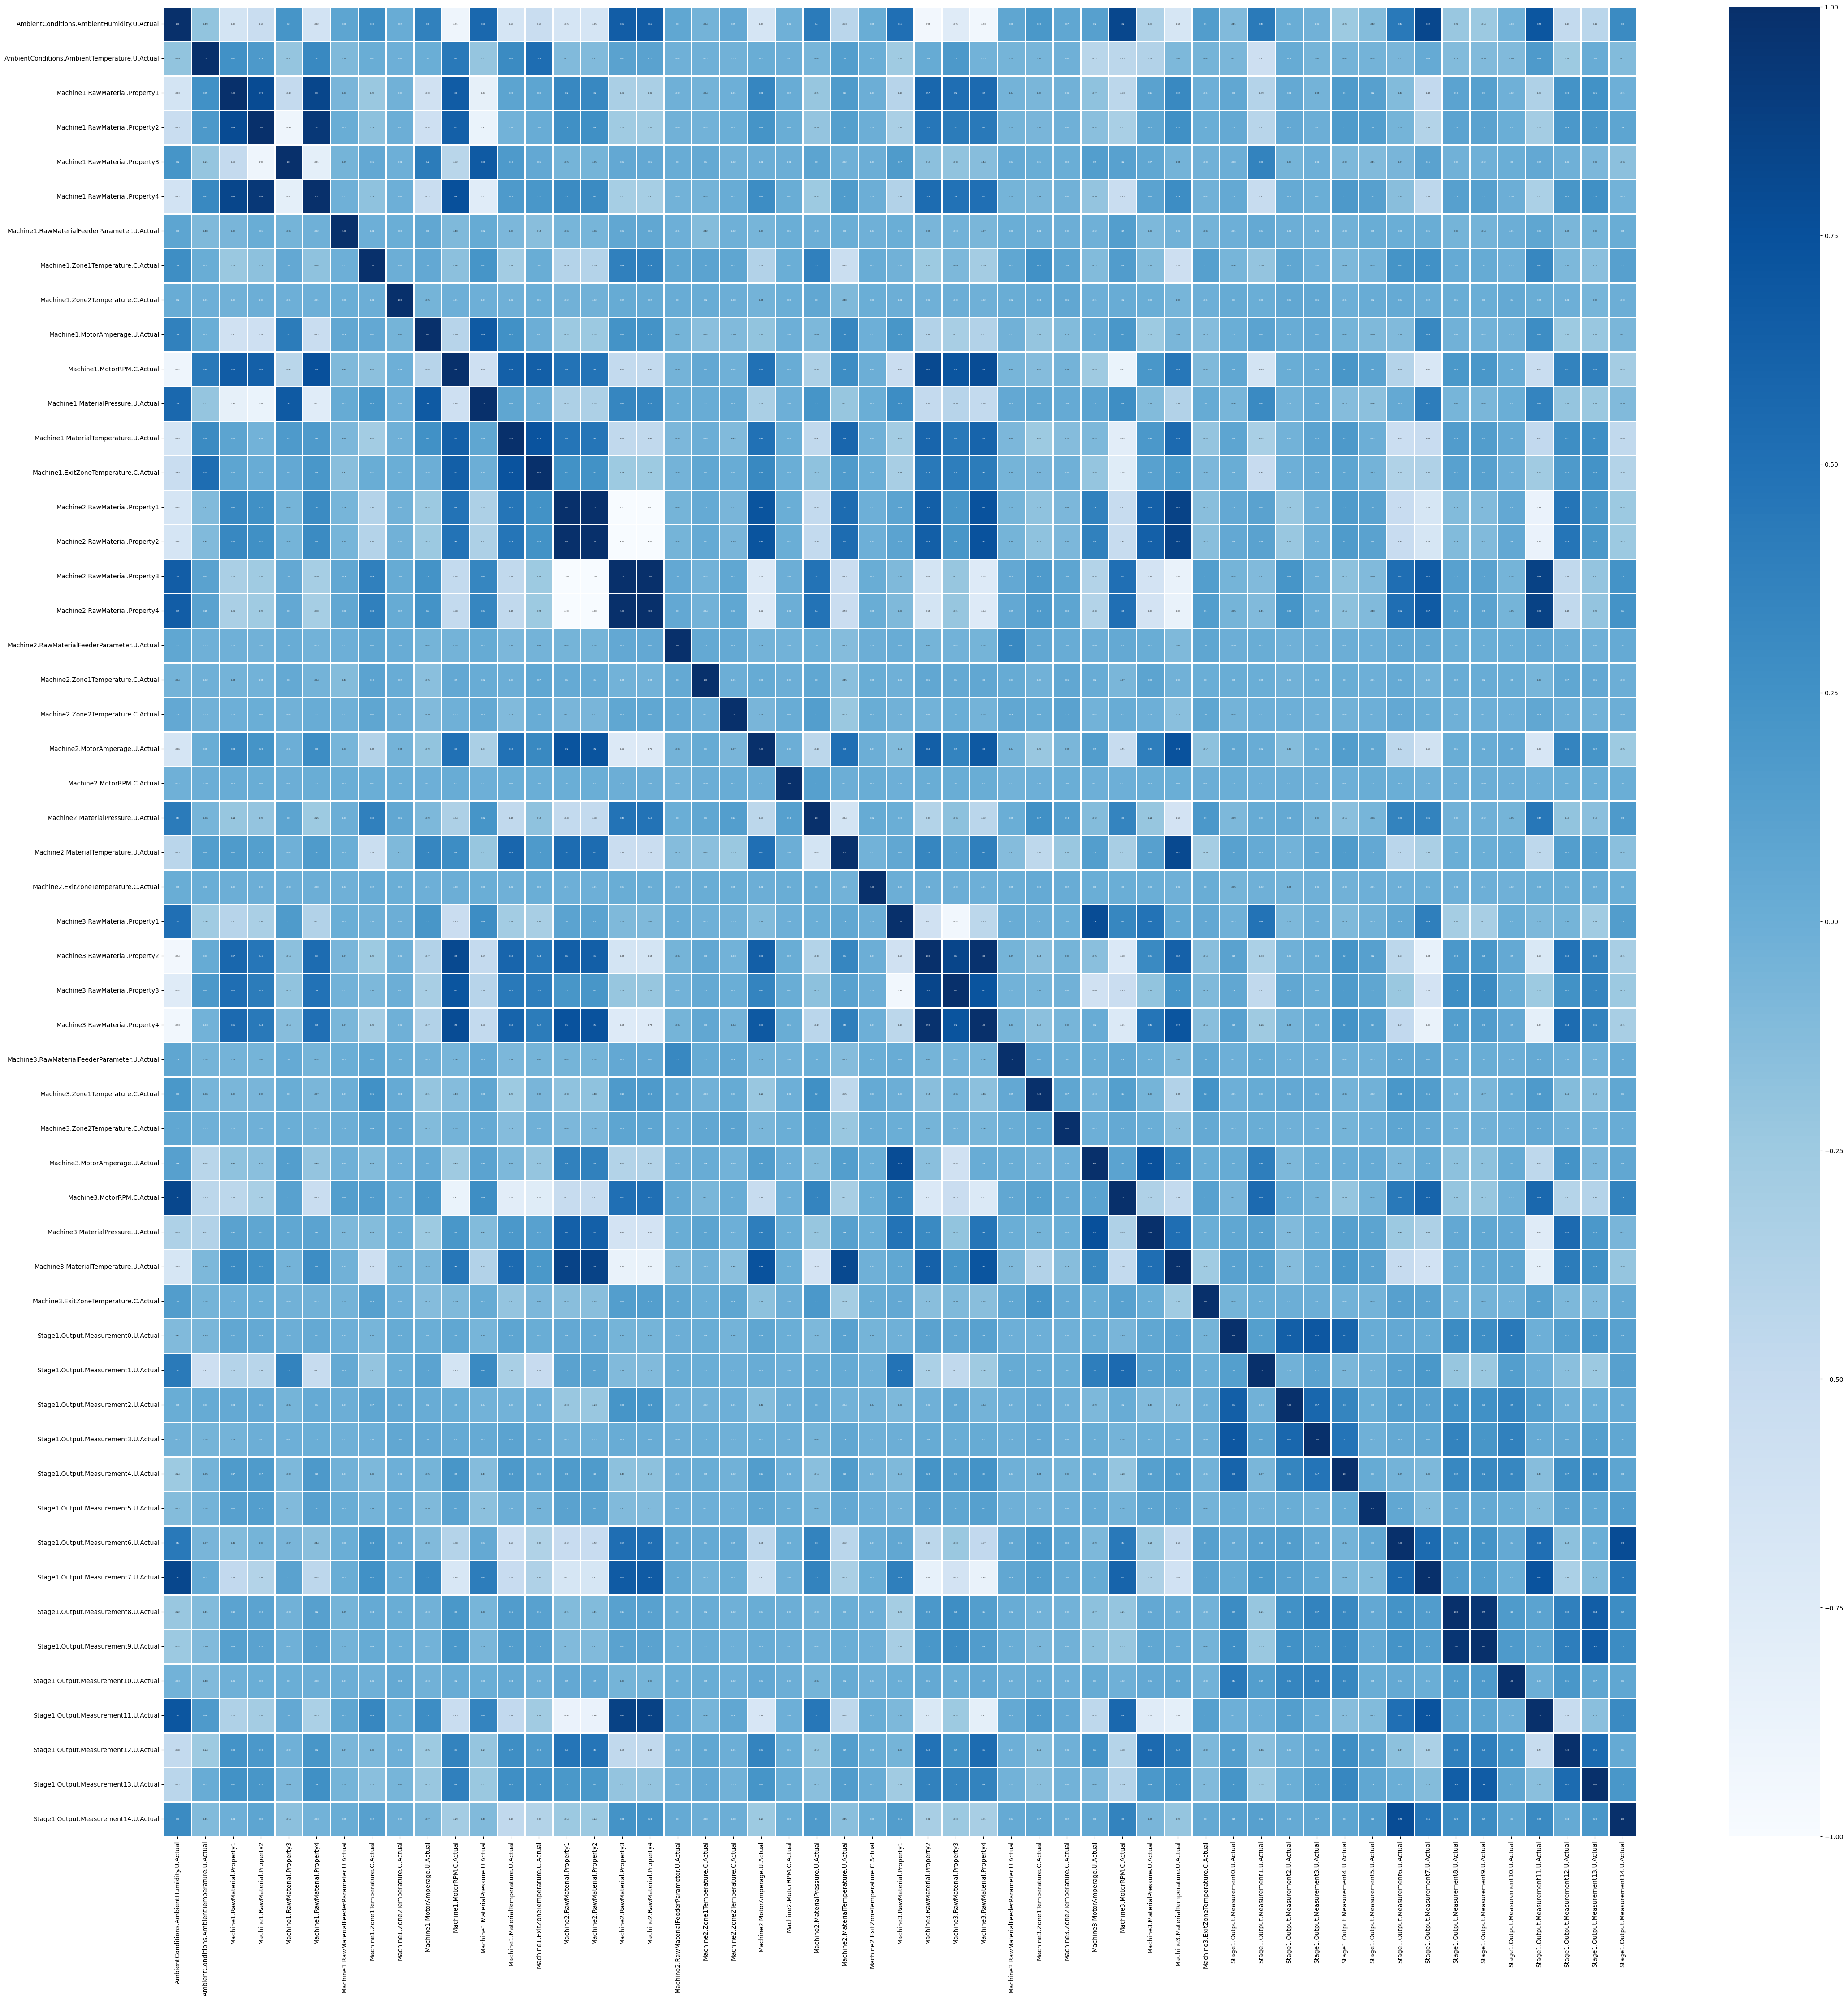

In [9]:
#상관관계 분석
plt.figure(figsize=(53,53))
sns.heatmap(stage1_corr.corr(), linewidths = 0.9, vmax = 1,cmap = 'Blues', fmt = '.2f',linecolor = "white",annot=True, annot_kws = {"size" : 3})

In [15]:
stage1_corr.corr()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
AmbientConditions.AmbientHumidity.U.Actual,1.000000,-0.194897,-0.633951,-0.529117,0.222551,-0.619637,0.081302,0.279626,0.022494,0.375186,...,-0.753091,-0.934720,0.077281,0.197808,0.065005,0.122850,0.821902,-0.351052,-0.669541,0.153868
AmbientConditions.AmbientTemperature.U.Actual,-0.194897,1.000000,0.254350,0.186433,-0.206952,0.319951,-0.097458,0.013392,-0.008430,0.007019,...,0.187278,-0.032925,-0.050681,-0.055884,-0.015809,-0.417252,-0.432450,-0.374521,-0.088687,-0.049801
Machine1.RawMaterial.Property1,-0.633951,0.254350,1.000000,0.791261,-0.488885,0.830641,-0.063600,-0.232788,-0.027212,-0.596192,...,0.521722,0.550149,-0.041289,-0.077194,-0.024993,-0.174634,-0.434743,0.107221,0.318293,-0.014637
Machine1.RawMaterial.Property2,-0.529117,0.186433,0.791261,1.000000,-0.902261,0.934531,0.012647,-0.165242,-0.003882,-0.582725,...,0.417821,0.440587,-0.050045,-0.062809,-0.019906,-0.152537,-0.313576,0.071298,0.259736,0.001539
Machine1.RawMaterial.Property3,0.222551,-0.206952,-0.488885,-0.902261,1.000000,-0.810742,-0.047404,0.052721,-0.013448,0.418198,...,-0.182517,-0.138105,0.036750,0.009263,0.000975,0.148226,0.116214,0.067559,-0.044415,-0.030033
Machine1.RawMaterial.Property4,-0.619637,0.319951,0.830641,0.934531,-0.810742,1.000000,-0.019399,-0.177846,-0.007921,-0.523578,...,0.484919,0.511341,-0.052576,-0.071170,-0.023722,-0.198492,-0.529720,0.098813,0.287117,-0.024954
Machine1.RawMaterialFeederParameter.U.Actual,0.081302,-0.097458,-0.063600,0.012647,-0.047404,-0.019399,1.000000,-0.010669,0.003567,0.056099,...,-0.034364,-0.074869,0.000889,-0.007544,-0.003253,-0.021870,0.145157,-0.087813,-0.024571,-0.042161
Machine1.Zone1Temperature.C.Actual,0.279626,0.013392,-0.232788,-0.165242,0.052721,-0.177846,-0.010669,1.000000,-0.006094,0.050832,...,-0.087182,-0.286837,0.065973,0.254710,0.089525,-0.115446,0.158765,-0.117873,-0.564173,0.125927
Machine1.Zone2Temperature.C.Actual,0.022494,-0.008430,-0.027212,-0.003882,-0.013448,-0.007921,0.003567,-0.006094,1.000000,-0.052928,...,-0.002392,-0.019376,0.015344,0.037843,0.059601,-0.013176,0.017815,0.003440,-0.059638,-0.014770
Machine1.MotorAmperage.U.Actual,0.375186,0.007019,-0.596192,-0.582725,0.418198,-0.523578,0.056099,0.050832,-0.052928,1.000000,...,-0.310506,-0.368887,-0.030366,-0.209833,-0.115494,0.031918,0.208127,-0.247380,-0.071312,-0.132766


In [16]:
#stage1 문제
raw_df_machine1

,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual
time_stamp,,,,,,,,,,,,
2019-03-06 10:52:33,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1
2019-03-06 10:52:38,11.54,200,963.00,247,1262.73,72.1,72.4,48.70,10.48,435.23,76.4,75.1
2019-03-06 10:52:40,11.54,200,963.00,247,1296.13,72.1,72.4,49.78,10.48,439.68,76.4,75.0
2019-03-06 10:52:42,11.54,200,963.00,247,1202.16,72.1,72.4,49.64,10.52,431.83,76.5,75.0
2019-03-06 10:52:43,11.54,200,963.00,247,1202.57,72.1,72.4,49.37,10.48,430.50,76.5,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06 14:47:13,12.22,201,1048.06,252,1258.05,72.0,71.8,73.05,12.14,429.02,83.7,80.0
2019-03-06 14:47:16,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,12.21,424.53,83.7,80.0
2019-03-06 14:47:17,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,12.17,426.73,83.7,80.0


In [155]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)
df_sclaed_df = pd.DataFrame(df_scaled)
X = df_sclaed_df

In [154]:
#X데이터
X = pd.concat([raw_df_machine0,raw_df_machine1,raw_df_machine2,raw_df_machine3,raw_df_firststage],axis=1)
X.shape

(11270, 41)

In [142]:
y=raw_df_stage1
y.shape

(11270, 15)

In [143]:
#특성컬럼제거
X=X.drop(['Machine2.RawMaterial.Property1','Machine2.RawMaterial.Property2','Machine3.MaterialTemperature.U.Actual'],axis=1)

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [165]:
X_train.shape

(9016, 41)

In [159]:
y_train.shape

(9016, 15)

In [161]:
model_stage1 = Sequential()
model_stage1.add(InputLayer(input_shape=(41,)))
model_stage1.add(Dense(units = 128,activation='relu')) #활성화함수를 안에 같이 써줘도 되고 따로 써줘도 무방함.
model_stage1.add(Dense(units = 64,activation='relu'))
model_stage1.add(Dense(units = 32,activation='relu'))
model_stage1.add(Dense(units = 16,activation='relu'))
model_stage1.add(tf.keras.layers.Dropout(0.2)),
model_stage1.add(Dense(units=15))

model_stage1.summary()
model_stage1.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
h1 = model_stage1.fit(X_train,y_train,validation_split=0.2,  #훈련데이터 내에서 20% 검증데이터로 사용
          epochs=300)
 #X_test를 넣었을 때 stage1 의 정답데이터

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               5376      
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_49 (Dense)            (None, 15)                255       
                                                                 
Total params: 16495 (64.43 KB)
Trainable params: 1649

Epoch 1/300
226/226 [==============================] - 1s 2ms/step - loss: 77.1678 - mse: 77.1678 - val_loss: 13.7059 - val_mse: 13.7059
Epoch 2/300
226/226 [==============================] - 0s 2ms/step - loss: 26.2010 - mse: 26.2010 - val_loss: 11.3399 - val_mse: 11.3399
Epoch 3/300
226/226 [==============================] - 0s 1ms/step - loss: 20.9782 - mse: 20.9782 - val_loss: 10.0069 - val_mse: 10.0069
Epoch 4/300
226/226 [==============================] - 0s 1ms/step - loss: 18.0914 - mse: 18.0914 - val_loss: 9.6795 - val_mse: 9.6795
Epoch 5/300
226/226 [==============================] - 0s 1ms/step - loss: 16.4796 - mse: 16.4796 - val_loss: 9.0418 - val_mse: 9.0418
Epoch 6/300
226/226 [==============================] - 0s 1ms/step - loss: 15.7314 - mse: 15.7314 - val_loss: 8.5057 - val_mse: 8.5057
Epoch 7/300
226/226 [==============================] - 0s 1ms/step - loss: 14.8002 - mse: 14.8002 - val_loss: 8.2249 - val_mse: 8.2249
Epoch 8/300
226/226 [============================

In [30]:
#제출할 데이터 확인하기
submission_origin = pd.read_csv('./submission_data.csv')

In [31]:
submission_data = submission_origin.drop(raw_df.filter(regex='Setpoint').columns,axis=1)

In [163]:
submission_stage_X = submission_data.iloc[:,1:42] 

In [33]:
submission_stage_X_modify=submission_stage_X.drop(['Machine2.RawMaterial.Property1','Machine2.RawMaterial.Property2','Machine3.MaterialTemperature.U.Actual'],axis=1)

In [164]:
submission_stage_X_modify.shape

(2818, 38)

In [168]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(submission_stage_X)
df_sclaed_df = pd.DataFrame(df_scaled)
X_submission = df_sclaed_df

In [169]:
#stage1 정답데이터
model_stage1_pre = model_stage1.predict(X_submission) 
#1,6,7,11,14measure
model_stage1_pre

89/89 [==============================] - 0s 748us/step


array([[10.923115  ,  5.1560173 ,  9.904131  , ...,  0.8188493 ,
         2.3455415 , 10.955605  ],
       [11.774936  ,  6.0412865 , 10.592365  , ...,  0.90245193,
         2.5308056 , 11.811291  ],
       [10.739177  ,  4.588917  ,  9.707199  , ...,  0.7889656 ,
         2.2958498 , 10.951999  ],
       ...,
       [12.885101  ,  1.0263476 , 11.464195  , ...,  1.4207404 ,
         3.1762836 ,  2.3653302 ],
       [12.883351  ,  1.0448961 , 11.46241   , ...,  1.4199134 ,
         3.1754286 ,  2.2922492 ],
       [12.8793125 ,  1.049242  , 11.457337  , ...,  1.4190344 ,
         3.175653  ,  2.1231465 ]], dtype=float32)

In [44]:
#stage2
raw_df_machine4 = raw_df_modify.filter(regex='Machine4') 
raw_df_machine5 = raw_df_modify.filter(regex='Machine5') 
raw_df_stage2 = raw_df_modify.filter(regex='Stage2') 

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X_stage2)
df_sclaed_df = pd.DataFrame(df_scaled)
X_stage2_scaler = df_sclaed_df

In [113]:
raw_df_machine5= raw_df_machine5.drop('Machine5.Temperature6.C.Actual',axis=1)

KeyError: "['Machine5.Temperature6.C.Actual'] not found in axis"

In [114]:
stage2_corr = pd.concat([raw_df_machine4,raw_df_machine5,raw_df_stage2],axis=1)

<Axes: >

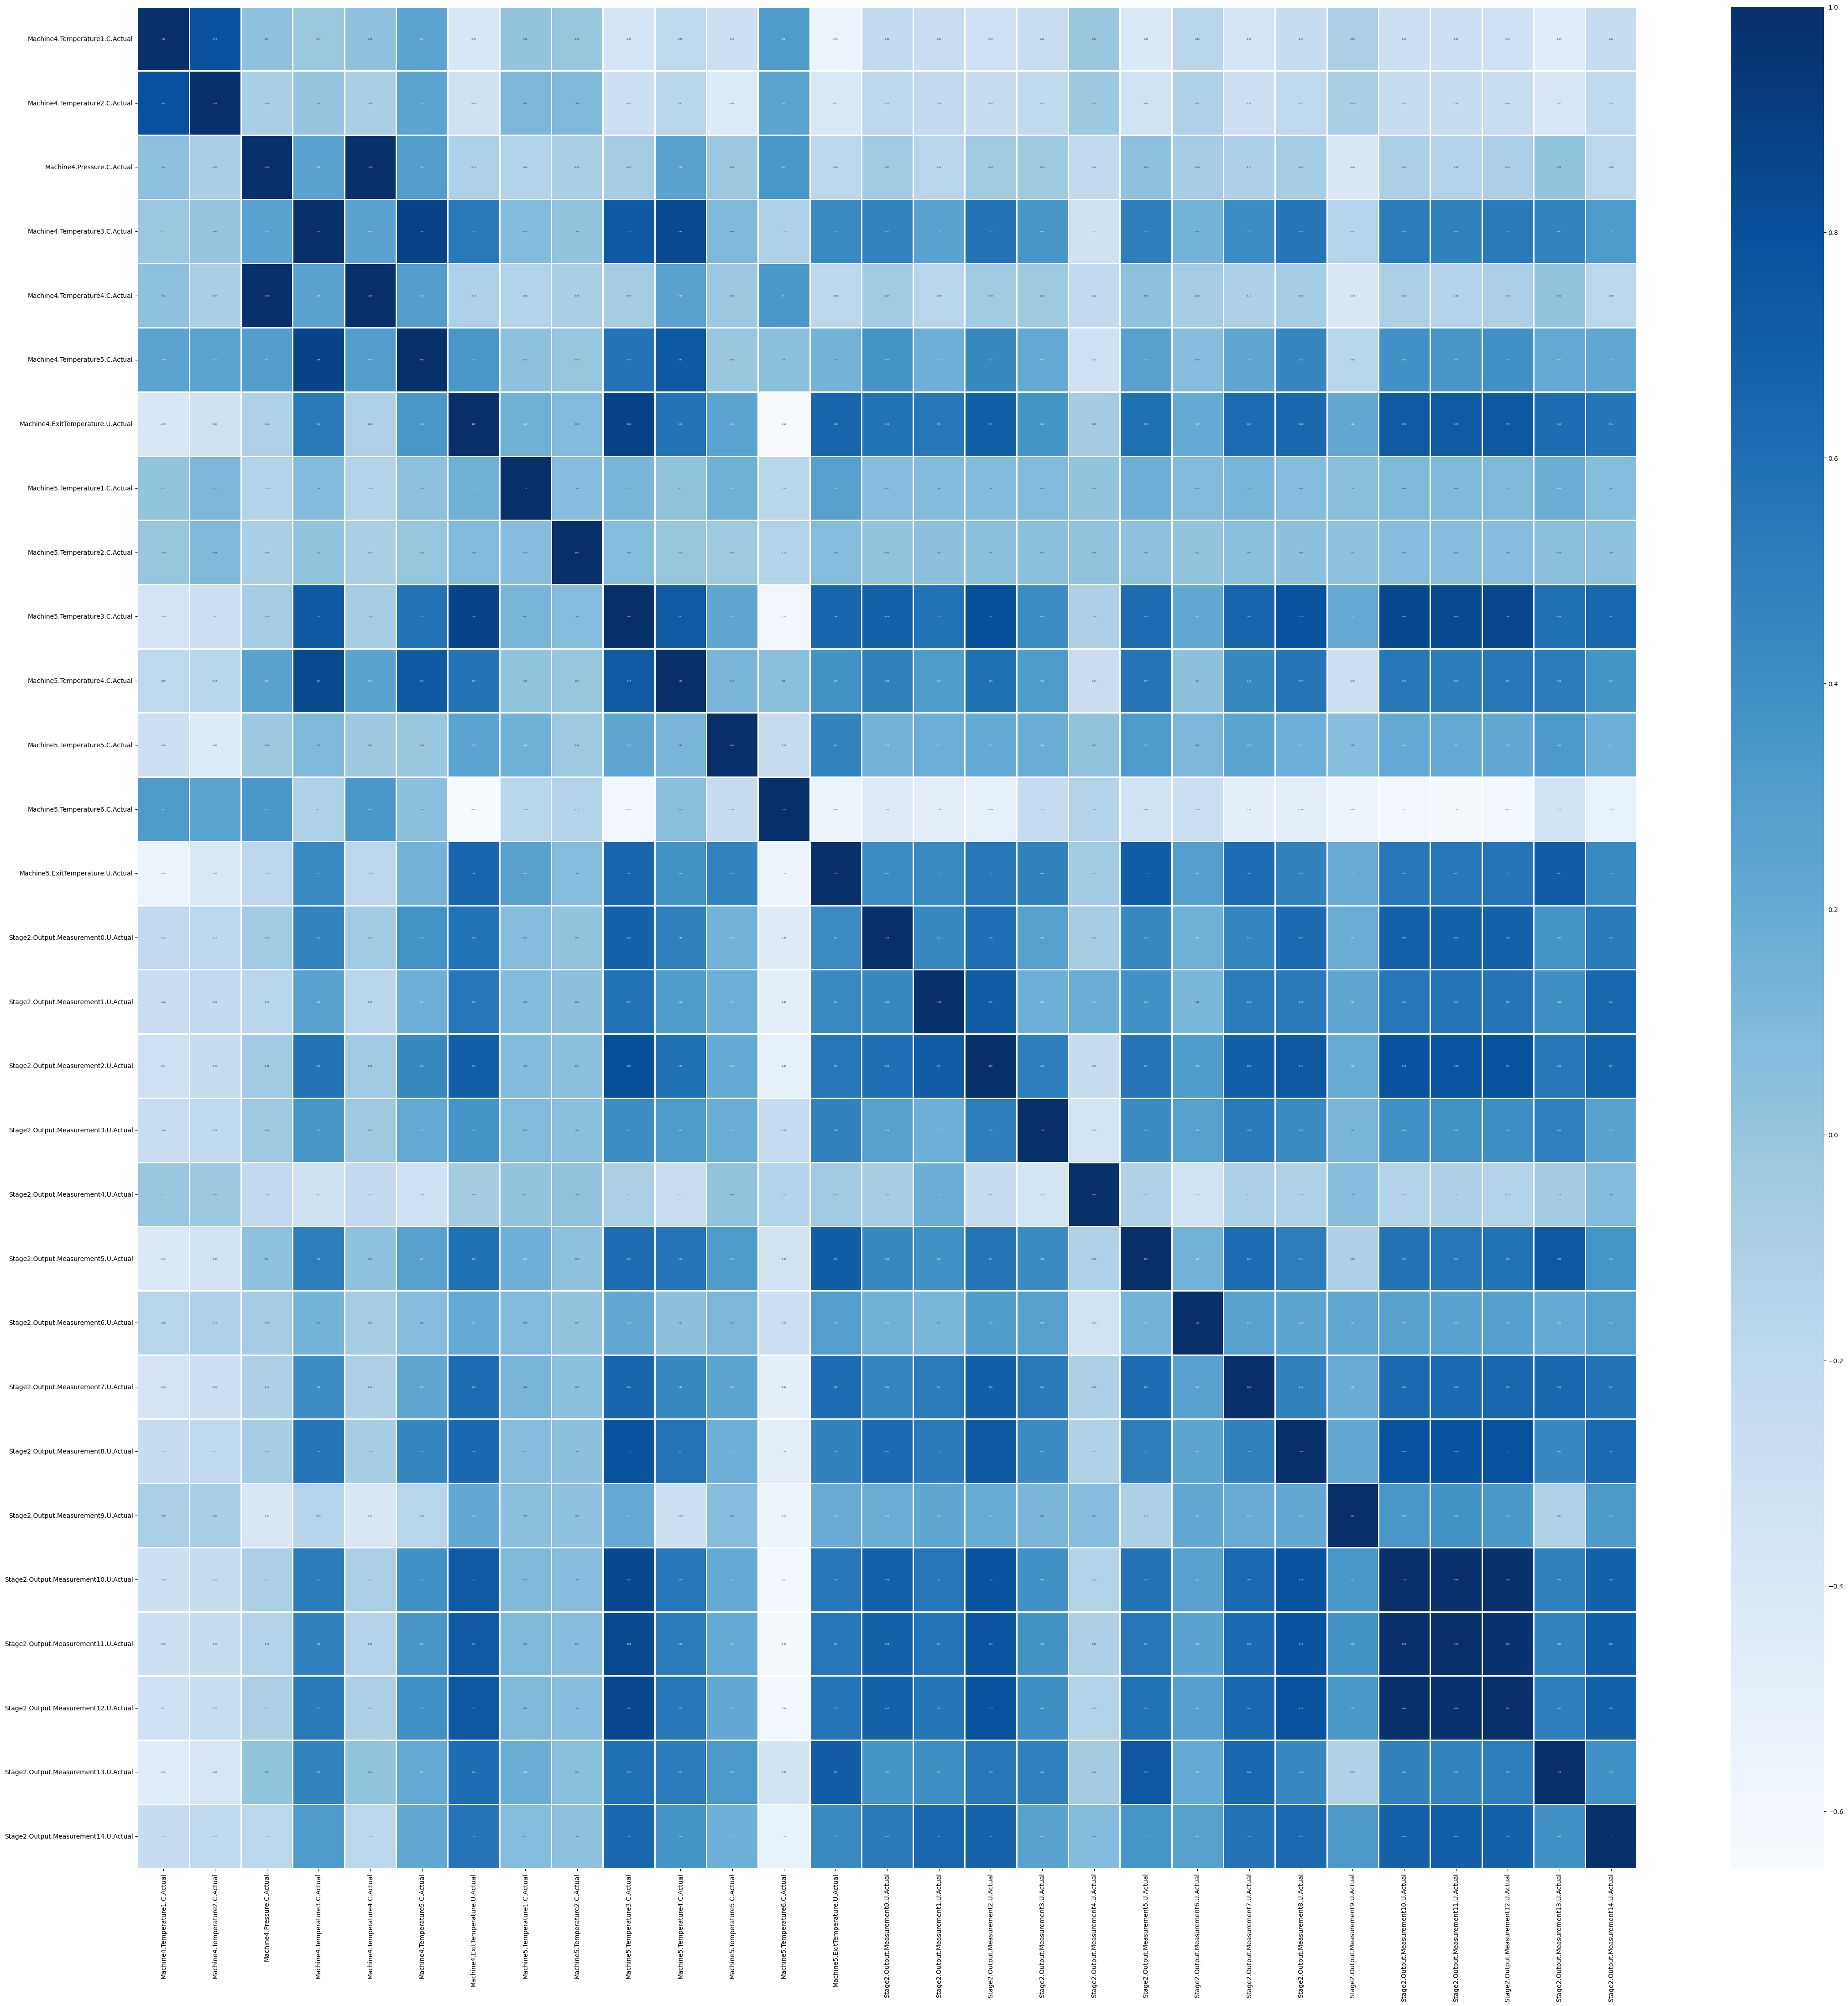

In [85]:
#상관관계
#상관관계 분석
plt.figure(figsize=(53,53))
sns.heatmap(stage2_corr.corr(), linewidths = 0.9, vmax = 1,cmap = 'Blues', fmt = '.2f',linecolor = "white",annot=True, annot_kws = {"size" : 3})

In [ ]:
#X데이터,y데이터 추출

In [162]:
X_stage2 = pd.concat([raw_df_machine4,raw_df_machine5],axis=1)
y_stage2 = raw_df_stage2

In [175]:
X_stage2.shape

(11270, 14)

In [173]:
#학습,테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train_stage2,X_test_stage2,y_train_stage2,y_test_stage2 = train_test_split(X_stage2_scaler,y_stage2,test_size=0.2)

In [176]:
model_stage2 = Sequential()
model_stage2.add(InputLayer(input_shape=(14,)))
model_stage2.add(Dense(units = 128,activation='relu')) #활성화함수를 안에 같이 써줘도 되고 따로 써줘도 무방함.
model_stage2.add(Dense(units = 64,activation='relu'))
model_stage2.add(Dense(units = 32,activation='relu'))
model_stage2.add(Dense(units = 16,activation='relu'))
model_stage2.add(Dense(units = 4,activation='relu'))
model_stage2.add(tf.keras.layers.Dropout(0.2)),
model_stage2.add(Dense(units=15))

model_stage2.summary()
model_stage2.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
model_stage2.fit(X_train_stage2,y_train_stage2,validation_split=0.2,  #훈련데이터 내에서 20% 검증데이터로 사용
          epochs=500)
 #X_test를 넣었을 때 stage1 의 정답데이터

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1920      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 4)                 68        
                                                                 
 dropout_10 (Dropout)        (None, 4)                 0         
                                                                 
 dense_61 (Dense)            (None, 15)              

In [179]:
submission_data.iloc[:,55:88] #stage2의 test 및 제출데이터
submission_stage2_X = submission_data.iloc[:,57:71] #stage2의 test 데이터(14개 특성)
submission_stage2_X = submission_stage2_X.drop('Machine5.Temperature6.C.Actual',axis=1)

In [180]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(submission_stage2_X)
df_sclaed_df = pd.DataFrame(df_scaled)
X_stage2_scaler = df_sclaed_df

In [181]:
model_stage2_pre = model_stage2.predict(X_stage2_scaler) #stage2의 정답데이터
model_stage2_pre

89/89 [==============================] - 0s 936us/step


array([[ 2.218131  ,  2.3675053 ,  2.4224863 , ...,  0.5785918 ,
         2.4414058 ,  1.5338092 ],
       [ 2.3529367 ,  2.4204433 ,  2.5343704 , ...,  0.59814966,
         2.458558  ,  1.6142206 ],
       [ 2.3015661 ,  2.40027   ,  2.4917336 , ...,  0.5906967 ,
         2.4520216 ,  1.5835781 ],
       ...,
       [12.089565  ,  6.2439866 , 10.615441  , ...,  2.0107534 ,
         3.6974142 ,  7.4220877 ],
       [12.089565  ,  6.2439866 , 10.615441  , ...,  2.0107534 ,
         3.6974142 ,  7.4220877 ],
       [12.089565  ,  6.2439866 , 10.615441  , ...,  2.0107534 ,
         3.6974142 ,  7.4220877 ]], dtype=float32)

In [99]:
#제출할 데이터 정리
model_stage1_pre.shape,model_stage2_pre.shape #stage1의 정답데이터 #stage2의 정답데이터

((2818, 15), (2818, 15))

In [170]:
submission_data.iloc[:,42:57] =  model_stage1_pre #submission1의 예측값만 저장
submission1 = submission_data.iloc[:,42:57]
submission1

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,10.923115,5.156017,9.904131,17.556541,25.487436,0.103206,1.824850,1.717367,16.921200,16.051338,6.435265,3.171306,0.818849,2.345541,10.955605
1,11.774936,6.041286,10.592365,19.166786,28.431440,0.128654,1.826201,1.614273,18.495903,17.053251,6.922086,2.987410,0.902452,2.530806,11.811291
2,10.739177,4.588917,9.707199,17.185703,25.039282,0.110806,1.781455,1.669705,16.752758,15.777249,6.274960,3.205363,0.788966,2.295850,10.951999
3,11.021766,5.305275,9.992116,17.751402,25.747583,0.104129,1.812630,1.678432,17.051228,16.146055,6.497465,3.117160,0.832179,2.363540,10.837967
4,10.319984,4.034646,9.640823,15.988718,23.761667,0.113622,2.026498,1.685716,15.271668,16.314472,6.352283,3.094501,0.971689,2.483873,11.403967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,12.906219,0.239900,11.476226,21.642021,34.061523,0.051910,0.129835,-0.213075,20.714970,18.795465,7.683433,-0.046482,1.417994,3.162726,1.061669
2814,12.901082,0.638403,11.474549,21.574734,33.762394,0.076760,0.269199,-0.180717,20.804441,18.893274,7.666989,0.048220,1.420396,3.169896,2.032989
2815,12.885101,1.026348,11.464195,21.538610,33.514111,0.080169,0.341950,-0.118885,20.942902,19.022400,7.655339,0.119470,1.420740,3.176284,2.365330
2816,12.883351,1.044896,11.462410,21.543800,33.510864,0.077310,0.335663,-0.111878,20.947796,19.024025,7.655700,0.119647,1.419913,3.175429,2.292249


In [182]:
submission_data.iloc[:,71:]  = model_stage2_pre 
submission2 =submission_data.iloc[:,71:]
submission2

,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
0,2.218131,2.367505,2.422486,9.252936,7.113286,1.734002,0.273195,1.361280,2.109833,3.010353,1.862287,1.373980,0.578592,2.441406,1.533809
1,2.352937,2.420443,2.534370,9.398256,7.033689,1.749600,0.276667,1.383216,2.341032,3.068156,1.941745,1.430058,0.598150,2.458558,1.614221
2,2.301566,2.400270,2.491734,9.342878,7.064022,1.743656,0.275344,1.374857,2.252926,3.046129,1.911466,1.408688,0.590697,2.452022,1.583578
3,2.132774,2.333986,2.351643,9.160922,7.163685,1.724125,0.270996,1.347390,1.963440,2.973753,1.811975,1.338473,0.566208,2.430545,1.482894
4,2.262089,2.384767,2.458969,9.300323,7.087331,1.739088,0.274327,1.368433,2.185221,3.029202,1.888196,1.392266,0.584969,2.446999,1.560030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,12.089565,6.243987,10.615441,19.894276,1.284648,2.876230,0.527449,2.967636,19.039856,7.243101,7.680822,5.480397,2.010753,3.697414,7.422088
2814,12.089565,6.243987,10.615441,19.894276,1.284648,2.876230,0.527449,2.967636,19.039856,7.243101,7.680822,5.480397,2.010753,3.697414,7.422088
2815,12.089565,6.243987,10.615441,19.894276,1.284648,2.876230,0.527449,2.967636,19.039856,7.243101,7.680822,5.480397,2.010753,3.697414,7.422088
2816,12.089565,6.243987,10.615441,19.894276,1.284648,2.876230,0.527449,2.967636,19.039856,7.243101,7.680822,5.480397,2.010753,3.697414,7.422088


In [171]:
import numpy as np
np.save('submission1.npy', submission1)

In [128]:
import numpy as np
np.save('submission2.npy', submission2)

In [134]:
#r2스코어
from sklearn.metrics import r2_score
r2=r2_score(model_stage2_real,model_stage2_pre)
r3=r2_score(model_stage1_real,model_stage1_pre)
r2


ValueError: Found input variables with inconsistent numbers of samples: [9016, 2818]

In [135]:
model_stage1_real = model_stage1.predict(X_train)
model_stage1_pre = model_stage1.predict(submission_stage_X_modify) 

model_stage2_real = model_stage2.predict(X_train_stage2)
model_stage2_pre = model_stage2.predict(submission_stage2_X) 

model_stage1_real.shape,model_stage1_pre.shape

89/89 [==============================] - 0s 725us/step


((9016, 15), (2818, 15))

# 제출 및 채점

아래 코드를 수정하면 정상적인 채점을 수행할 수 없습니다.

In [28]:
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

ModuleNotFoundError: No module named 'elice_challenge'

In [ ]:
# 제출 파일 업로드
await upload()

이전에 업로드 된 파일 삭제중...
업로드가 완료되었습니다.


In [ ]:
# 채점 수행
await check_score()

TypeError: %d format: a number is required, not str